## <b>Disclaimer</b>
<br>
All of the plots and charts looked much more visible in the editor version of the notebook but when viewed in publication it seems more hard to read
<br>
Same applies to some text which appears different from how it looks in the original notebook
<br>
If a plot is too hard to be seen, just right click then select open image in a new tab for better visibility. Or just open the notebook itself
<br>
<br>
This notebook consists of two parts:
<br>
- An executive summary to conclude all the results at the first section
<br>
- A second section which consists of more insights and how every part works

 # Executive Summary

## Problem Statement

You work for a medical device manufacturer in Switzerland. Your company manufactures orthopedic devices and sells them worldwide. The company sells directly to individual doctors who use them on rehabilitation and physical therapy patients. Historically, the sales and customer support departments have grouped doctors by geography. However, the region is not a good predictor of the number of purchases a doctor will make or their support needs. Your team wants to use a data-centric approach to segmenting doctors to improve marketing, customer service, and product planning.

## Answering our Questions

### What is the Number of Doctors per Region?

Now getting to our first requirement
<br>
We find that region "1 13" has the highest number of doctors while,
<br>
regions as "3 16", "5 18", and "23 3" have a very low count of 1 doctor in each region

![image-caption](Plots/DoctorsPerRegion.png)

### What is the Average Number of Purchases per Region?

The below graph shows the number of purchases per region in a descending layout

![image-caption](Plots/PurchasesPerRegion.png)

### Is There a Relation Between Complaints and Purchases?

We plot a correlation matrix between the number of purchases and the number of complaints
<br>
But... we won't stop just at the number of purchases, we might as well include all the types of the complaints in our relations
<br>
As we can notice, there is almost no relation between the purchases and any complaint number or type
<br>
But we can also notice that the number of complaints is related to the correct and incorrect types of complaints. 
<br>
Which means that as the number of complaints increases, there is a big chance its either one of them

![image-caption](Plots/CorrMatrix.png)

### Segmenting the Doctors

Now we start segmenting our doctors according to many variables
<br>
As seen in the figure below, we have 3 segments. Segment number 0 has the highest number of doctors, probably they share mutual properties

<![image-caption](Plots/Clusters.png)

### Which Features Impact Each Segment the Most?

The figure below describes which features impact each segments the most
<br>
The segments are presented as three clusters and the importance decreases in the clockwise direction
<br>
As seen from the three plots, we can conclude that:
- <b>For the first segment</b>:
    - Most effective features: Category and Satisfaction
    - Least effective features: Instructions and total complaints
- <b>For the second segment</b>:
    - Most effective features: Satisfaction and doctor rank
    - Least effective features: Total complaints and instructions
- <b>For the third segment</b>:
    - Most effective features: Instructions and doctor category
    - Least effective features: Total complaint and the incidence rate


<![image-caption](Plots/ClusterImportances.png)

## Conclusion

The below figures shows:
- A radar plot showing the numerical data relative to each other cluster (not absolute values)
- A box under each plot indicating all the properties of this cluster like the most common doctors rank or what affects this cluster the most
<br>
Now as we see, each radar explains each variable with its relation to the other segments
<br>
Like for example, the third segment shows highest number of purchases while the first shows low and the second shows the lowest of them
<br>
The bottom boxes indicate the average or most common features of each cluster like the region, most complaint type
<br>
Now we have reached the end, we need to conclude how to reach each segment effectively
<br>
<br>
Taking First segment as an example, we see that it is well distinguished from other segments by the satisfaction
<br>
So we can try improving first segment satisfaction by checking their complaints since we can expect higher percentage of complaints
<br>
Or we can make sure to help them lower their R rate or Incidence Rate a bit
<br>
They are also mostly specialist ambassadors which means they are from our top performing ranks, so we would probably want to improve their satisfaction more

![image-caption](Plots/Result.png)

# For the Geeks/Developers

In the following part of the notebook, you ..<b>*cough</b> ... nerd ... <b>*cough</b>.. will go through how every process, data ,or plot was established and built
<br>Of course it's not the best out there but i do hope it conveys the message behind it
<br>I tried writing comments before or after each cell to help you understand what happens
<br>For sure i could not write a comment for each line because i am too lazy to write all of this
<br>I do hope you enjoy your reading and have a good time

## Setup the environment

### Importing Required Libraries

Here we import all the libraries we will need
<br>- numpy is for data manipulation
<br>- pandas for storing our data
<br>- matplotlib and seaborn for visualization
<br>- yellowbrick for our selecting best number of clusters
<br>- kmeans_interp is a library made by YousefGh based on SKLearnd KMeans with some enhancements https://github.com/YousefGh/kmeans-feature-importance

In [1]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans

try:
    from yellowbrick.cluster.elbow import kelbow_visualizer
except ModuleNotFoundError:
    ! pip install yellowbrick
    from yellowbrick.cluster.elbow import kelbow_visualizer
    
try:
    from kmeans_interp.kmeans_feature_imp import KMeansInterp
except ModuleNotFoundError:
    ! git clone https://github.com/YousefGh/kmeans-feature-importance.git
    ! mv "./kmeans-feature-importance/kmeans_interp/" "."
    ! pip install -r "kmeans-feature-importance/requirements.txt"
    from kmeans_interp.kmeans_feature_imp import KMeansInterp

## Reading our Data

When loading our data we make sure that we skip the NA values so we can do operations smoothly

### Firstly, we load the doctors data
The doctors data represents information about the doctors as a table which has the following features:
- "DoctorID" - is a unique identifier for each doctor.
- "Region" - the current geographical region of the doctor.
- "Category" - the type of doctor, either 'Specialist' or 'General Practitioner.'
- "Rank" - is an internal ranking system. It is an ordered variable: The highest level is Ambassadors, followed by Titanium Plus, Titanium, Platinum Plus, Platinum, Gold Plus, Gold, Silver Plus, and the lowest level is Silver.
- "Incidence rate"  and "R rate" - relate to the amount of re-work each doctor generates.
- "Satisfaction" - measures doctors' satisfaction with the company.
- "Experience" - relates to the doctor's experience with the company.
- "Purchases" - purchases over the last year.

In [2]:
doctors = pd.read_csv('data/doctors.csv')
doctors = doctors.dropna()
doctors

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases
0,AHDCBA,4 15,Specialist,Ambassador,49.00,0.90,53.85,1.20,49.0
1,ABHAHF,1 8 T4,General Practitioner,Ambassador,37.00,0.00,100.00,0.00,38.0
2,FDHFJ,1 9 T4,Specialist,Ambassador,33.00,1.53,--,0.00,34.0
3,BJJHCA,1 10 T3,Specialist,Ambassador,28.00,2.03,--,0.48,29.0
4,FJBEA,1 14 T4,Specialist,Ambassador,23.00,0.96,76.79,0.75,24.0
...,...,...,...,...,...,...,...,...,...
432,AIABDJ,1 10,Specialist,Ambassador,2.18,0.80,11.76,0.77,35.0
433,BBAJCF,1 9 T4,Specialist,Ambassador,2.17,1.68,--,0.11,19.0
434,GGCFB,1 19 T4,Specialist,Ambassador,2.14,0.77,--,0.27,22.0
435,FDCEG,1 9,Specialist,Ambassador,2.13,0.84,100.00,0.32,25.0


### Secondly, we load the orders data
The orders data contains details on orders and is represented as a table with the following features:
- "DoctorID" - doctor id (matches the other tables).
- "OrderID" - order identifier.
- "OrderNum" - order number.
- "Conditions A through J" - map the different settings of the devices in each order. Each order goes to an individual patient.

In [3]:
orders = pd.read_csv('data/orders.csv')
orders = orders.dropna()
orders

,DoctorID,OrderID,OrderNum,Condition A,Condition B,Condition C,Condition D,Condition F,Condition G,Condition H,Condition I,Condition J
0,ABJEAI,DGEJFDC,AIBEHCJ,False,False,False,False,False,True,True,False,Before
3,EHHGF,DGCDCCF,AIBJJEE,False,False,False,True,False,False,True,False,Before
8,AABDHC,DEHCIAA,AHEIDCG,False,False,False,False,False,False,True,False,Before
9,BCFJAB,DEIIFJB,AHFEGEI,False,False,False,False,False,False,True,False,Before
10,BCFJAB,DEIIFJB,AHFEGEI,False,False,False,True,False,False,True,False,Before
...,...,...,...,...,...,...,...,...,...,...,...,...
251,FJFEG,DGDBFBF,AIBCDJB,False,False,False,False,False,False,False,False,Before
252,FJFEG,DGDBGJH,AIBCDCE,False,True,False,False,False,True,True,False,Before
253,FJFEG,DGDBGGI,AIBCDGD,False,False,True,False,False,False,True,False,Before
254,FJFEG,DGEABGI,AIBFJHE,True,False,False,False,False,False,False,False,Before


### Thirdly, we load the complaints data
The complaints data collects information on doctor complaints and is represented as a table with the following features:
- "DoctorID" - doctor id (matches the other tables).
- "Complaint Type" - the company's classification of the complaints.
- "Qty" - number of complaints per complaint type per doctor.

In [4]:
complaints = pd.read_csv('data/complaints.csv')
complaints = complaints.dropna()
complaints

,DoctorID,Complaint Type,Qty
0,EHAHI,Correct,10
1,EHDGF,Correct,2
2,EHDGF,Unknown,3
3,EHDIJ,Correct,8
4,EHDIJ,Incorrect,2
...,...,...,...
430,BHGIFC,Incorrect,1
431,BHHDDF,Correct,1
432,CJAFAB,Incorrect,1
433,CAAHID,Correct,2


### Lastly, we load the instructions data
The instructions data has information on whether the doctor includes special instructions on their orders and is represented as:
- "DoctorID" - doctor id (matches the other tables).
- "Instructions" - 'Yes' when the doctor includes special instructions, 'No' when they do not.

In [5]:
instructions = pd.read_csv('data/instructions.csv')
instructions = instructions.dropna()
instructions

,DoctorID,Instructions
0,ADIFBD,Yes
1,ABHBED,No
2,FJFEG,Yes
3,AEBDAB,No
4,AJCBFE,Yes
...,...,...
72,ABEAFF,Yes
73,FCGCI,Yes
74,FBAHD,Yes
75,FCABB,Yes


## Exploring the Data

Here we run some basic analysis over the dataset like the number of doctors, how many doctors available in each rank, total purchases, etc.
<br>You can feel free to skip this part if you already performed analysis on this dataset

### Analyzing the Doctors

First, we analyze the doctors data

#### Producing the counts from data available

Here we generate basic counting of the available doctors data like how many General Practitioner are there. 

In [6]:
statistics_df = pd.DataFrame()
statistics_df['Number of Doctors'] = [doctors["DoctorID"].nunique()]
statistics_df['Number of Regions'] = [doctors["Region"].nunique()]
statistics_df[ doctors["Category"].value_counts().index ] = [doctors["Category"].value_counts()]
statistics_df[ doctors["Rank"].value_counts().index ] = [doctors["Rank"].value_counts()]
statistics_df['Total Purchases'] = [doctors['Purchases'].sum()]
statistics_df

,Number of Doctors,Number of Regions,Specialist,General Practitioner,Ambassador,Platinum,Titanium,Platinum Plus,Gold Plus,Silver Plus,Gold,Silver,Titanium Plus,Total Purchases
0,435,46,366,69,115,77,69,54,50,44,22,3,1,4705.0


#### Generating the Graphs

After getting the statistics ready, we now have to visualize them

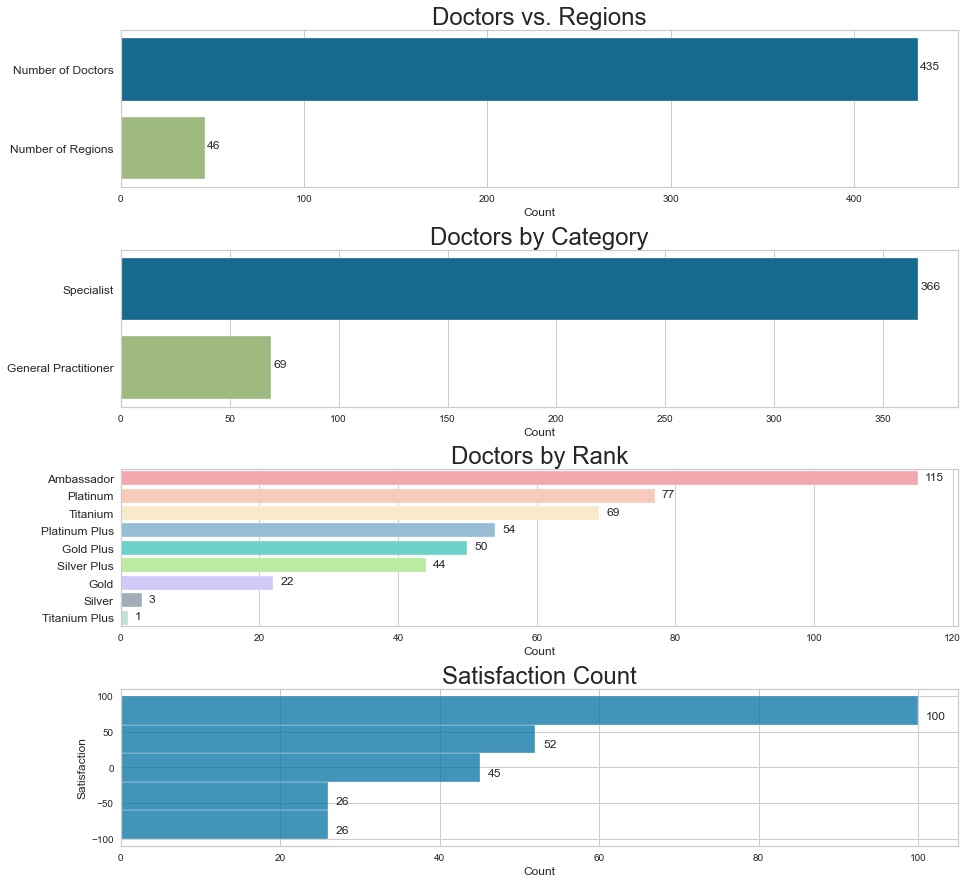

In [7]:
sns.set_style("whitegrid")

Ranks = statistics_df[['Ambassador','Platinum','Titanium','Platinum Plus','Gold Plus','Silver Plus', 'Gold', 'Silver','Titanium Plus']]

palette=["#FF9AA2" if x=='Ambassador' else 
         "#FFC7B3" if x=='Platinum' else 
         "#FFECC2" if x=='Titanium' else 
         "#8CC0DE" if x=='Platinum Plus' else 
         "#5AE4D9" if x=='Gold Plus' else 
         "#B5F893" if x=='Silver Plus' else 
         "#CDC1FF" if x=='Gold' else 
         "#9DADBD" if x=='Silver' else
         "#B5EAD5" if x=='Titanium Plus' else
         "#CFB7FE" for x in Ranks.columns]



fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, figsize = (15,15))

sns.barplot(data=statistics_df[['Number of Doctors','Number of Regions']], orient='h', ax=ax1)
sns.barplot(data=statistics_df[['Specialist','General Practitioner']], orient='h', ax=ax2)
sns.barplot(data=Ranks, orient='h', ax=ax3, palette=palette)
sns.histplot(data=pd.DataFrame(doctors[doctors['Satisfaction'] != '--']['Satisfaction'].astype(float)), y='Satisfaction' , bins=5, ax=ax4)

ax1.set_yticklabels(ax1.get_yticklabels(), size = 12)
ax2.set_yticklabels(ax2.get_yticklabels(), size = 12)
ax3.set_yticklabels(ax3.get_yticklabels(), size = 12)
ax4.set_ylabel("Satisfaction", size = 12)

ax1.set_xlabel("Count", size = 12)
ax2.set_xlabel("Count", size = 12)
ax3.set_xlabel("Count", size = 12)
ax4.set_xlabel("Count", size = 12)

ax1.set_title("Doctors vs. Regions", size = 24)
ax2.set_title("Doctors by Category", size = 24)
ax3.set_title("Doctors by Rank", size = 24)
ax4.set_title("Satisfaction Count", size = 24)

for p in ax1.patches:
    ax1.annotate(int(p.get_width()) , (p.get_width()+1, p.get_y()+0.4), fontsize=12)
    
for p in ax2.patches:
    ax2.annotate(int(p.get_width()) , (p.get_width()+1, p.get_y()+0.4), fontsize=12)
    
for p in ax3.patches:
    ax3.annotate(int(p.get_width()) , (p.get_width()+1, p.get_y()+0.5), fontsize=12)

for p in ax4.patches:
    ax4.annotate(int(p.get_width()) , (p.get_width()+1, p.get_y()+8), fontsize=12)
    
plt.subplots_adjust(hspace=0.4)
plt.savefig("Plots/Doctors.png", bbox_inches="tight")

### Analyzing the Orders

Here we have an insight about which doctors made most purchases per rank or category based on both the doctors and orders data

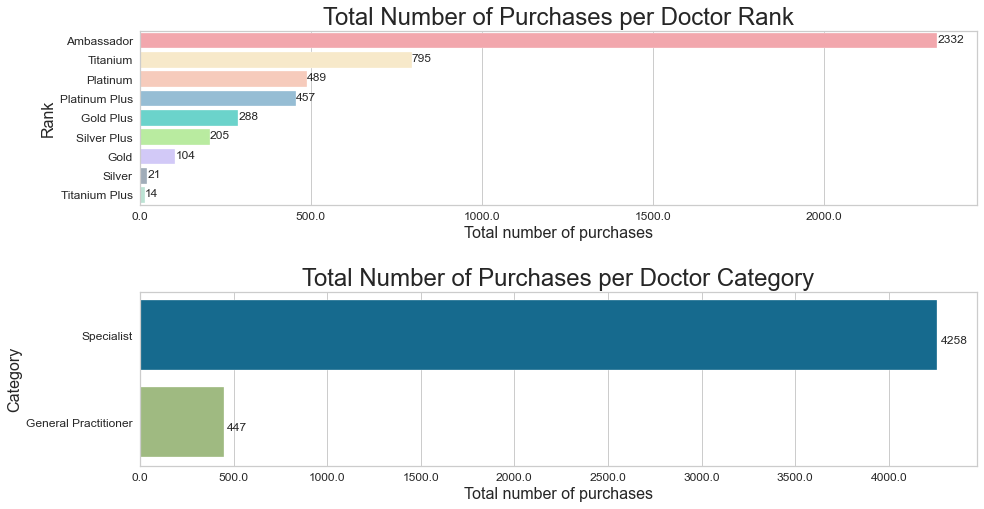

In [8]:
orders_groupped = doctors.groupby('Rank').sum().reset_index()
orders_groupped2 = doctors.groupby('Category').sum().reset_index()

order = orders_groupped.sort_values("Purchases", ascending=False).Rank

palette=["#FF9AA2" if x=='Ambassador' else 
         "#FFC7B3" if x=='Platinum' else 
         "#FFECC2" if x=='Titanium' else 
         "#8CC0DE" if x=='Platinum Plus' else 
         "#5AE4D9" if x=='Gold Plus' else 
         "#B5F893" if x=='Silver Plus' else 
         "#CDC1FF" if x=='Gold' else 
         "#9DADBD" if x=='Silver' else
         "#B5EAD5" if x=='Titanium Plus' else
         "#CFB7FE" for x in order]


sns.set_style("whitegrid")
fig, (ax1,ax2) = plt.subplots(nrows=2, figsize = (15,8))
sns.barplot(data=orders_groupped, y="Rank", x="Purchases", order=order, ax=ax1, palette=palette)

ax1.set_yticklabels(ax1.get_yticklabels(), size = 12)
ax1.set_xticklabels(ax1.get_xticks(), size = 12)

ax1.set_xlabel("Total number of purchases",  fontsize=16)
ax1.set_ylabel("Rank", fontsize=16)

ax1.set_title("Total Number of Purchases per Doctor Rank",  fontsize=24)

sns.barplot(data=orders_groupped2, y="Category", x="Purchases", order=orders_groupped2.sort_values("Purchases", ascending=False).Category, ax=ax2)

ax2.set_yticklabels(ax2.get_yticklabels(), size = 12)
ax2.set_xticklabels(ax2.get_xticks(), size = 12)

ax2.set_xlabel("Total number of purchases",  fontsize=16)
ax2.set_ylabel("Category", fontsize=16)

ax2.set_title("Total Number of Purchases per Doctor Category",  fontsize=24)

for p in ax1.patches:
    ax1.annotate(int(p.get_width()) , (p.get_width()+0.3, p.get_y()+0.5), fontsize=12)
    
for p in ax2.patches:
    ax2.annotate(int(p.get_width()) , (p.get_width()+20, p.get_y()+0.5), fontsize=12)

plt.subplots_adjust(hspace=0.5)
plt.savefig("Plots/Orders1.png", bbox_inches="tight")

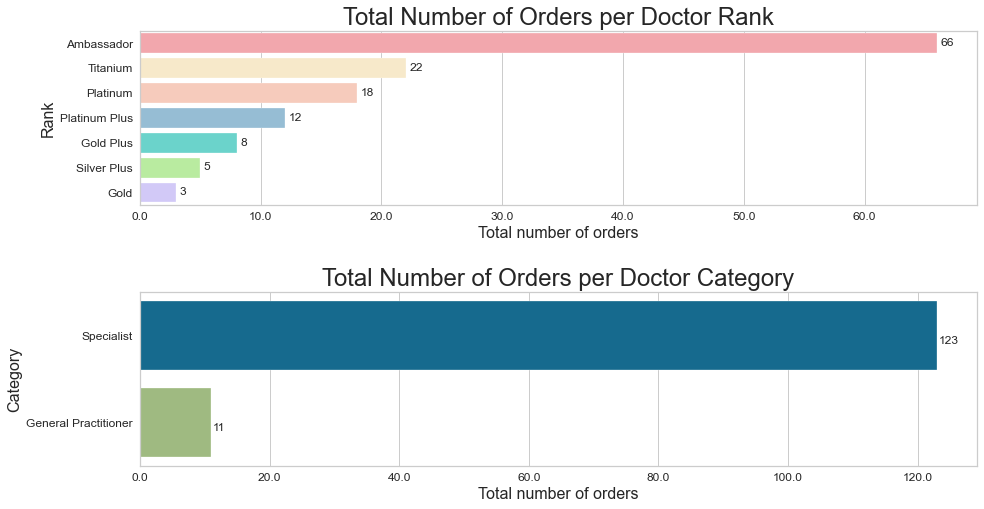

In [9]:
orders_df=pd.DataFrame(orders['DoctorID'].value_counts()).reset_index()
orders_df.columns=['DoctorID','Count']
orders_df=pd.merge(orders_df, doctors.iloc[:,:4], on='DoctorID', how='left')
orders_groupped = orders_df.groupby('Category').sum().reset_index()
orders_groupped2 = orders_df.groupby('Rank').sum().reset_index()
sns.set_style("whitegrid")

order = orders_groupped2.sort_values('Count',ascending = False).Rank

palette=["#FF9AA2" if x=='Ambassador' else 
         "#FFC7B3" if x=='Platinum' else 
         "#FFECC2" if x=='Titanium' else 
         "#8CC0DE" if x=='Platinum Plus' else 
         "#5AE4D9" if x=='Gold Plus' else 
         "#B5F893" if x=='Silver Plus' else 
         "#CDC1FF" if x=='Gold' else 
         "#9DADBD" if x=='Silver' else
         "#B5EAD5" if x=='Titanium Plus' else
         "#CFB7FE" for x in order]

fig, (ax1,ax2) = plt.subplots(nrows=2, figsize = (15,8))
sns.barplot(data=orders_groupped, y="Category", x="Count", order=orders_groupped.sort_values('Count',ascending = False).Category, ax=ax2)
ax2.set_yticklabels(ax2.get_yticklabels(), size = 12)
ax2.set_xticklabels(ax2.get_xticks(), size = 12)
ax2.set_xlabel("Total number of orders",  fontsize=16)
ax2.set_ylabel("Category", fontsize=16)
ax2.set_title("Total Number of Orders per Doctor Category",  fontsize=24)

sns.barplot(data=orders_groupped2, y="Rank", x="Count", order=order, ax=ax1, palette=palette)
ax1.set_yticklabels(ax1.get_yticklabels(), size = 12)
ax1.set_xticklabels(ax1.get_xticks(), size = 12)
ax1.set_xlabel("Total number of orders",  fontsize=16)
ax1.set_ylabel("Rank", fontsize=16)
ax1.set_title("Total Number of Orders per Doctor Rank",  fontsize=24)

for p in ax1.patches:
    ax1.annotate(int(p.get_width()) , (p.get_width()+0.3, p.get_y()+0.5), fontsize=12)

for p in ax2.patches:
    ax2.annotate(int(p.get_width()) , (p.get_width()+0.3, p.get_y()+0.5), fontsize=12)

plt.subplots_adjust(hspace=0.5)
plt.savefig("Plots/Orders2.png", bbox_inches="tight")

### Performance of Each Category/Rank

Now we analyze how each rank/category of doctors performed
<br>This is achieved by calculating the average number purchases (which is the total number of purchases/count of doctors)
<br>This helps us in telling whether a specific rank or category is performing well regardless of the total number of purchases

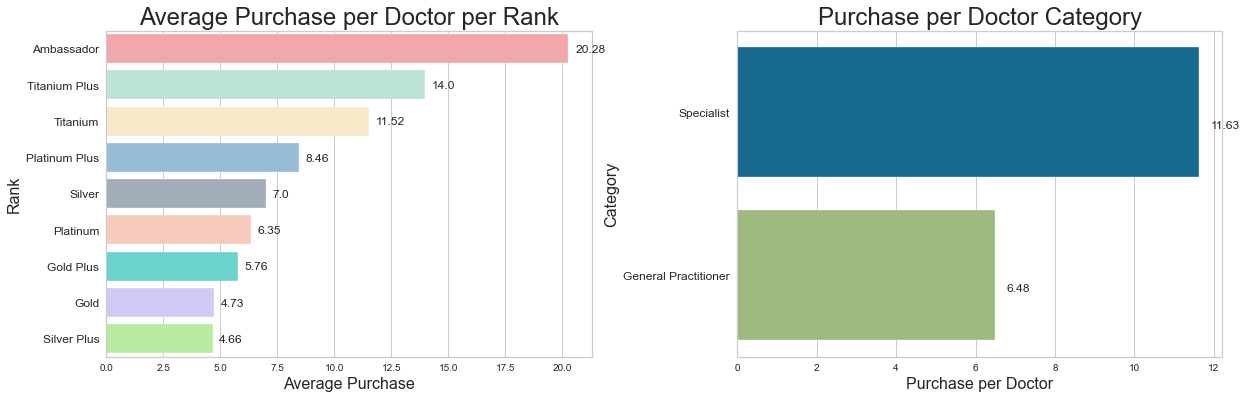

In [10]:
Ranks = ['Ambassador','Platinum','Titanium','Platinum Plus','Gold Plus','Silver Plus', 'Gold', 'Silver','Titanium Plus']
Categories = ['General Practitioner', 'Specialist']
data = statistics_df[Ranks].values[0]

stats_df = statistics_df[Ranks].melt()
stats_df.columns = ["Rank", "Count"]

stats_df2 = statistics_df[Categories].melt()
stats_df2.columns = ["Category", "Count"]

orders_groupped = doctors.groupby('Rank').sum().reset_index()
orders_groupped2 = doctors.groupby('Category').sum().reset_index()

stats_df = pd.merge(orders_groupped, stats_df, on="Rank")
stats_df["Ratio"] = (stats_df['Purchases']/stats_df['Count']).round(2)

stats_df2 = pd.merge(orders_groupped2, stats_df2, on="Category")
stats_df2["Ratio"] = (stats_df2['Purchases']/stats_df2['Count']).round(2)

order = stats_df.sort_values("Ratio", ascending=False).Rank

palette=["#FF9AA2" if x=='Ambassador' else 
         "#FFC7B3" if x=='Platinum' else 
         "#FFECC2" if x=='Titanium' else 
         "#8CC0DE" if x=='Platinum Plus' else 
         "#5AE4D9" if x=='Gold Plus' else 
         "#B5F893" if x=='Silver Plus' else 
         "#CDC1FF" if x=='Gold' else 
         "#9DADBD" if x=='Silver' else
         "#B5EAD5" if x=='Titanium Plus' else
         "#CFB7FE" for x in order]

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (20,6))

ax1 = sns.barplot(data=stats_df ,y="Rank", x="Ratio", orient='h', ax=ax1, order=order, palette=palette)
ax2 = sns.barplot(data=stats_df2 ,y="Category", x="Ratio", orient='h', ax=ax2, order=stats_df2.sort_values("Ratio", ascending=False).Category)

ax1.set_yticklabels(ax1.get_yticklabels(), size = 12)
ax2.set_yticklabels(ax2.get_yticklabels(), size = 12)

ax1.set_xlabel("Average Purchase",  fontsize=16)
ax1.set_ylabel("Rank", fontsize=16)

ax1.set_title("Average Purchase per Doctor per Rank",  fontsize=24)

ax2.set_xlabel("Purchase per Doctor",  fontsize=16)
ax2.set_ylabel("Category", fontsize=16)

ax2.set_title("Purchase per Doctor Category",  fontsize=24)

for p in ax1.patches:
    ax1.annotate(p.get_width() , (p.get_width()+0.3, p.get_y()+0.5), fontsize=12)
    
for p in ax2.patches:
    ax2.annotate(p.get_width() , (p.get_width()+0.3, p.get_y()+0.5), fontsize=12)

plt.subplots_adjust(wspace=0.3)
plt.savefig("Plots/DoctorsPerformance.png", bbox_inches="tight")

Now we see that the ambassadors have the highest ratio of 20.28 purchase per doctor in that rank

## How many doctors are there in each region?

Here we start answering our first question, we is the number of doctors per region

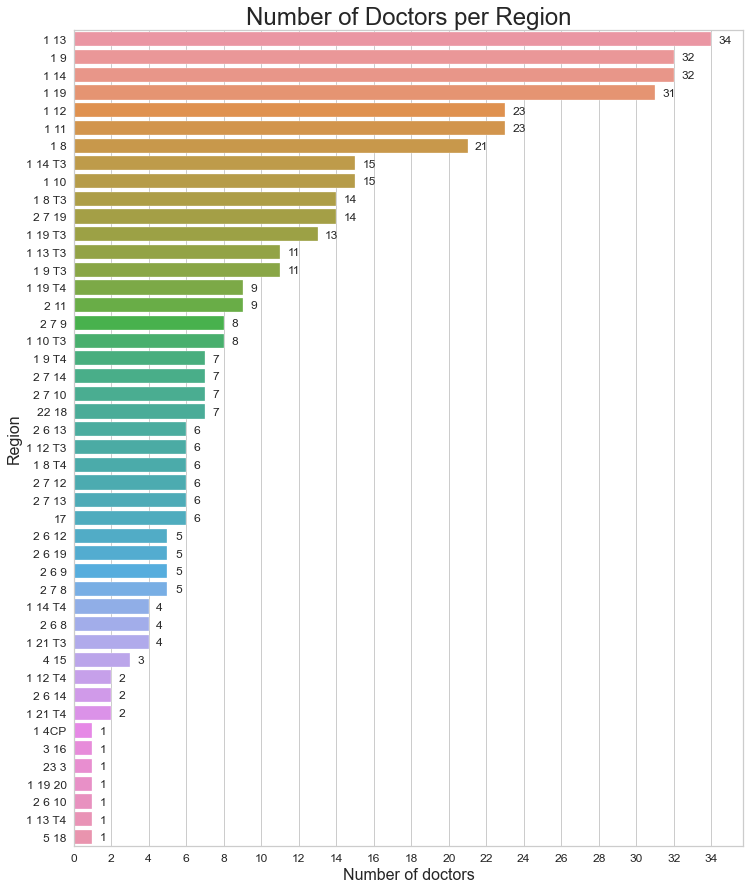

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,15))
ax = sns.countplot(data=doctors, y="Region", order=doctors['Region'].value_counts().index)
ax.set_xticks(range(0,35,2))
ax.set_yticklabels(ax.get_yticklabels(), size = 12)
ax.set_xticklabels(ax.get_xticks(), size = 12)
ax.set_xlabel("Number of doctors",  fontsize=16)
ax.set_ylabel("Region", fontsize=16)
ax.set_title("Number of Doctors per Region",  fontsize=24)

for p in ax.patches:
    ax.annotate(p.get_width() , (p.get_width()+0.4, p.get_y()+0.6), fontsize=12)

plt.savefig("Plots/DoctorsPerRegion.png", bbox_inches="tight")

## What is the Average Number of Purchases per Region?

The second question to answer is the average number of purchases per region
<br>We can a analyze this using two approaches, the orders data and the doctors data

### Approach using the orders data

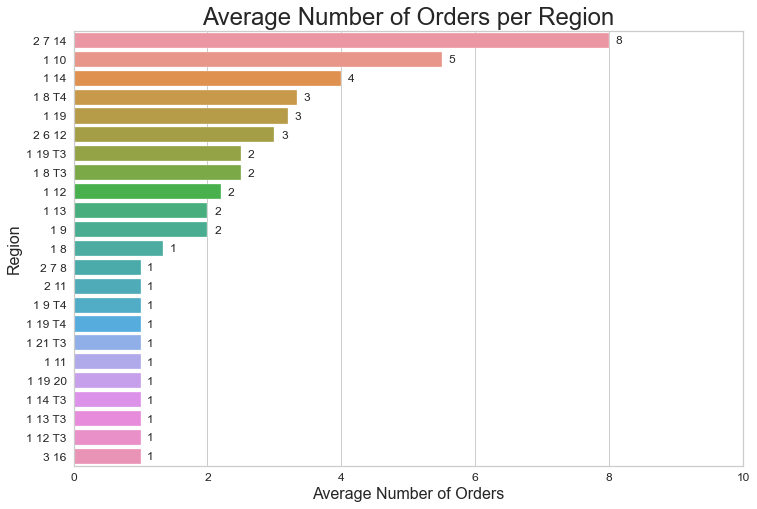

In [12]:
orders_df=pd.DataFrame(orders['DoctorID'].value_counts()).reset_index()
orders_df.columns=['DoctorID','Count']
orders_df=pd.merge(orders_df, doctors.iloc[:,:2], on='DoctorID', how='left')

orders_groupped = orders_df.groupby('Region').mean().reset_index()
orders_groupped["Count"] = round(orders_groupped["Count"], 2)

sns.set_style("whitegrid")
plt.figure(figsize = (12,8))
ax = sns.barplot(data=orders_groupped, y="Region", x="Count", order=orders_groupped.sort_values('Count',ascending = False).Region)

ax.set_xticks(range(0,11,2))
ax.set_yticklabels(ax.get_yticklabels(), size = 12)
ax.set_xticklabels(ax.get_xticks(), size = 12)
ax.set_xlabel("Average Number of Orders",  fontsize=16)
ax.set_ylabel("Region", fontsize=16)
ax.set_title("Average Number of Orders per Region",  fontsize=24)

for p in ax.patches:
    ax.annotate(int(p.get_width()) , (p.get_width()+0.1, p.get_y()+0.6), fontsize=12)


### Approach using the doctors data

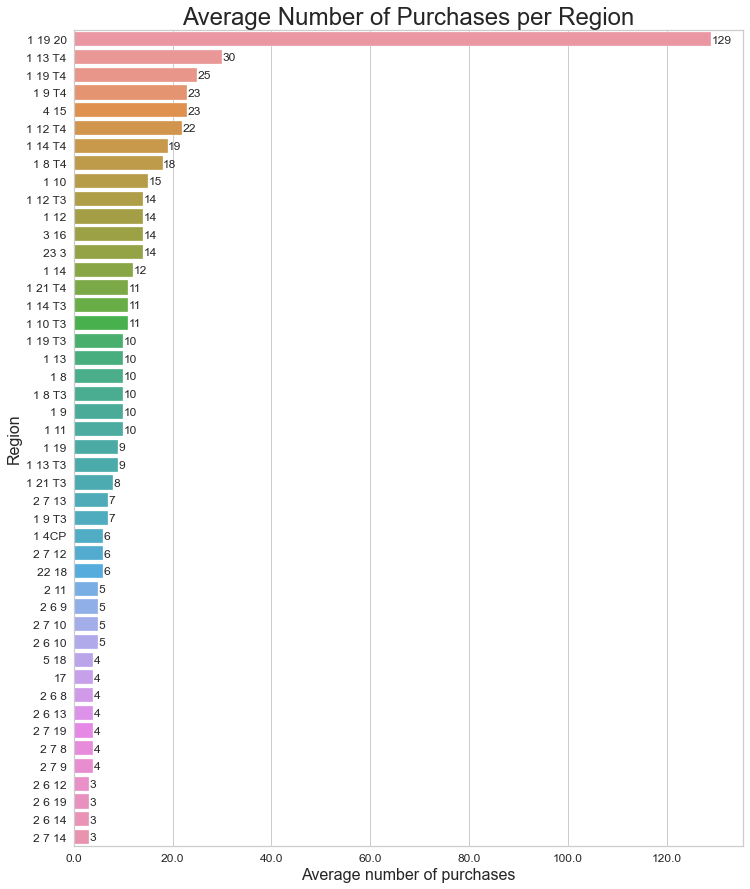

In [13]:
purchases_df = pd.DataFrame(doctors.groupby('Region').Purchases.mean().astype(int).reset_index())

plt.figure(figsize = (12,15))
ax = sns.barplot(data=purchases_df, y="Region", x="Purchases", order=purchases_df.sort_values('Purchases',ascending = False).Region)
sns.set_style("whitegrid")
ax.set_yticklabels(ax.get_yticklabels(), size = 12)
ax.set_xticklabels(ax.get_xticks(), size = 12)
ax.set_xlabel("Average number of purchases",  fontsize=16)
ax.set_ylabel("Region", fontsize=16)
ax.set_title("Average Number of Purchases per Region",  fontsize=24)

for p in ax.patches:
    ax.annotate(int(p.get_width()) , (p.get_width()+0.1, p.get_y()+0.6), fontsize=12)

plt.savefig("Plots/PurchasesPerRegion.png", bbox_inches="tight")

## Is There a Relation Between Complaints and Purchases?

We now have to find whether there is a relation between the number of purchases and the complaints regarding both the complaints quantity and type
<br>As before, we do this using two approaches, one approach is using the orders data and the other using the doctors data
<br>But... we won't stop just at the number of purchases, we might as well include all the types of the complaints in our relations

### Approach using the Orders data

We start by grouping the complaints according to each doctor and summing the total number of complaints under the Qty column
<br>The next step is to view what types of complaints each doctor usually makes, creating a column for each complaint type

In [14]:
complaints_groupped = complaints.groupby(by=["DoctorID"],as_index=False,sort=True).Qty.sum()
complaints_groupped = pd.get_dummies(complaints, columns=["Complaint Type"]).groupby(by=["DoctorID"],as_index=False,sort=True).sum()
complaints_groupped.head()

,DoctorID,Qty,Complaint Type_Correct,Complaint Type_Incorrect,Complaint Type_R&R,Complaint Type_Specific,Complaint Type_Unknown
0,AAAEAH,1,1,0,0,0,0
1,AAAHCE,4,1,1,0,0,1
2,AABDHC,1,0,1,0,0,0
3,AABGAB,4,1,0,0,0,1
4,AACCGA,1,0,1,0,0,0


Then we group the orders data according to each doctor and summing the total number of orders under the Count column

In [15]:
orders_groupped = orders_df.groupby('DoctorID').Count.sum()
doctors_IDS=doctors["DoctorID"]
orders_groupped = pd.merge(doctors_IDS,orders_groupped, on="DoctorID", how='left').fillna(0).sort_values(by='Count', ascending=False)
orders_groupped.head()

,DoctorID,Count
115,AAAEAH,10.0
396,FAHDI,9.0
271,FBFHB,8.0
145,AFCADC,6.0
326,ACDBJE,5.0


Then we merge the two dataframes together to use it as our correlation data

In [16]:
orders_complains = pd.merge(orders_groupped, complaints_groupped, on="DoctorID", how="left").fillna(0)
orders_complains.rename(columns = {'Count':'Number of orders', 'Qty':'Number of complaints'}, inplace = True)
orders_complains.head()

,DoctorID,Number of orders,Number of complaints,Complaint Type_Correct,Complaint Type_Incorrect,Complaint Type_R&R,Complaint Type_Specific,Complaint Type_Unknown
0,AAAEAH,10.0,1.0,1.0,0.0,0.0,0.0,0.0
1,FAHDI,9.0,2.0,1.0,1.0,0.0,0.0,0.0
2,FBFHB,8.0,2.0,1.0,1.0,0.0,0.0,0.0
3,AFCADC,6.0,2.0,1.0,1.0,0.0,0.0,0.0
4,ACDBJE,5.0,1.0,1.0,0.0,0.0,0.0,0.0


The last step is to plot the correlation matrix between those items in our dataframe

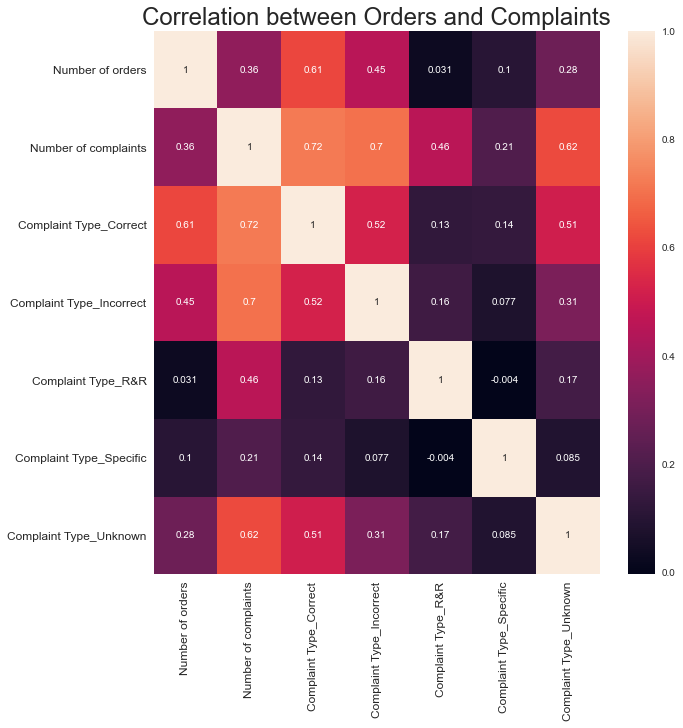

In [17]:
plt.figure(figsize = (10,10))

ax = sns.heatmap(orders_complains.corr(), annot=True)
ax.set_title("Correlation between Orders and Complaints",  fontsize=24)
ax.set_yticklabels(ax.get_yticklabels(), size = 12)
ax.set_xticklabels(ax.get_xticklabels(), size = 12)
plt.show()

### Approach using the doctors data

We start by merging the complaints data previously created with the total number of purchases from the doctors data

In [18]:
doctors_groupped = doctors[['DoctorID','Purchases']]

purchases_complaints = pd.merge(doctors_groupped, complaints_groupped, on="DoctorID", how="left").fillna(0)
purchases_complaints.rename(columns = {'Count':'Number of orders', 'Qty':'Number of complaints'}, inplace = True)
purchases_complaints = purchases_complaints.sort_values('Number of complaints', ascending=False)
purchases_complaints

,DoctorID,Purchases,Number of complaints,Complaint Type_Correct,Complaint Type_Incorrect,Complaint Type_R&R,Complaint Type_Specific,Complaint Type_Unknown
164,AAEIEG,11.0,20.0,1.0,1.0,1.0,0.0,1.0
109,BABEFH,7.0,14.0,1.0,1.0,0.0,0.0,1.0
390,FBHHI,11.0,12.0,1.0,1.0,0.0,0.0,1.0
356,AIEBFD,8.0,12.0,1.0,1.0,0.0,1.0,1.0
84,BABGJG,83.0,10.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
156,BDAIBI,5.0,0.0,0.0,0.0,0.0,0.0,0.0
155,BCHIGJ,5.0,0.0,0.0,0.0,0.0,0.0,0.0
153,BCECCB,6.0,0.0,0.0,0.0,0.0,0.0,0.0
151,BACHDJ,6.0,0.0,0.0,0.0,0.0,0.0,0.0


Then we plot the relation between the number of purchases and the complaints number and types

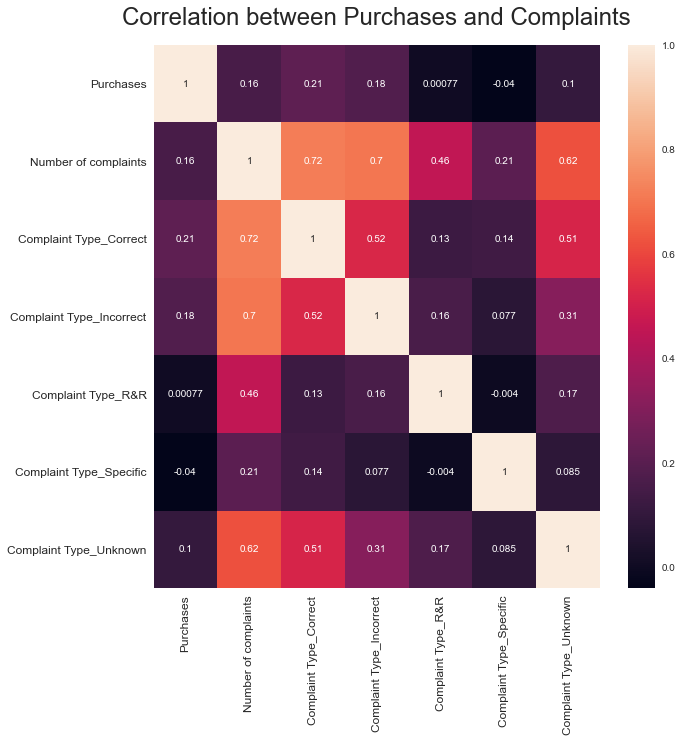

In [19]:
plt.figure(figsize = (10,10))

ax = sns.heatmap(purchases_complaints.corr(), annot=True)
ax.set_title("Correlation between Purchases and Complaints",  fontsize=24, pad=20)
ax.set_yticklabels(ax.get_yticklabels(), size = 12)
ax.set_xticklabels(ax.get_xticklabels(), size = 12)
plt.savefig("Plots/CorrMatrix.png", bbox_inches="tight")
plt.show()

## Let's Start Clustering

### Organizing our Data

We start by labeling some columns like the rank as categories then converting each value in this category to a number (Knows as encoding)
<br>For example, a doctor with category of General Practitioner is converted to 0, while a Specialist is converted to 1
<br>This helps us in the clustering machine learning model later on

In [20]:
Doctors_prepared = doctors.copy()
Doctors_prepared['Satisfaction'] = np.where(Doctors_prepared['Satisfaction'] == '--', 0, Doctors_prepared['Satisfaction'])

Doctors_prepared['Region'] = Doctors_prepared['Region'].astype('category')
Doctors_prepared['Category'] = Doctors_prepared['Category'].astype('category')
Doctors_prepared['Rank'] = Doctors_prepared['Rank'].astype('category')

Region_dict = dict(enumerate(Doctors_prepared['Region'].cat.categories))
Category_dict = dict(enumerate(Doctors_prepared['Category'].cat.categories))
Rank_dict = dict(enumerate(Doctors_prepared['Rank'].cat.categories))

Doctors_prepared['Region'] = Doctors_prepared['Region'].cat.codes
Doctors_prepared['Category'] = Doctors_prepared['Category'].cat.codes
Doctors_prepared['Rank'] = Doctors_prepared['Rank'].cat.codes

Doctors_prepared.head()

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases
0,AHDCBA,44,1,0,49.0,0.90,53.85,1.20,49.0
1,ABHAHF,21,0,0,37.0,0.00,100.00,0.00,38.0
2,FDHFJ,24,1,0,33.0,1.53,0,0.00,34.0
3,BJJHCA,1,1,0,28.0,2.03,0,0.48,29.0
4,FJBEA,11,1,0,23.0,0.96,76.79,0.75,24.0


Then we encode the instructions data

In [21]:
instructions_prepared = instructions.copy()
instructions_prepared['Instructions'] = np.where(instructions_prepared['Instructions'] == 'Yes', 2, 1)
instructions_prepared.head()

,DoctorID,Instructions
0,ADIFBD,2
1,ABHBED,1
2,FJFEG,2
3,AEBDAB,1
4,AJCBFE,2


Thirdly, we organize the complaints by calculating the total number of complaints per doctor and what was the most complaints type
<br>And of course we encode the most complaint type

In [22]:
sum_complaints = complaints.groupby('DoctorID', as_index=False).Qty.sum()
most_complatints = complaints.groupby('DoctorID', as_index=False).Qty.max()
most_complatints2 = complaints.groupby(['DoctorID','Complaint Type'], as_index=False).Qty.sum()
most_complatints = pd.merge(most_complatints, most_complatints2, on=['DoctorID','Qty'])
most_complatints  = most_complatints.drop_duplicates(subset='DoctorID').drop('Qty', axis=1)
complaints_prepared = pd.merge(sum_complaints, most_complatints, how='left', on='DoctorID')

complaints_prepared['Complaint Type'] = complaints_prepared['Complaint Type'].astype('category')
Complaint_dict = dict(enumerate(complaints_prepared['Complaint Type'].cat.categories))
complaints_prepared['Complaint Type'] = complaints_prepared['Complaint Type'].cat.codes.apply(lambda x: x+1)

complaints_prepared.rename(columns = {'Complaint Type':'Most Complaint', 'Qty':'Total Complaints'}, inplace = True)
complaints_prepared.head()

,DoctorID,Total Complaints,Most Complaint
0,AAAEAH,1,1
1,AAAHCE,4,2
2,AABDHC,1,2
3,AABGAB,4,1
4,AACCGA,1,2


We then have to merge all these frames together to form one big frame to feed it to our model

In [23]:
Doctors_Instructions = pd.merge(Doctors_prepared,instructions_prepared, on="DoctorID", how='left').fillna(0)
#Doctors_Instructions
Doctors_Instructions_Complaints = pd.merge(Doctors_Instructions, complaints_prepared, on="DoctorID", how='left').fillna(0)
Doctors_Instructions_Complaints.head()

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases,Instructions,Total Complaints,Most Complaint
0,AHDCBA,44,1,0,49.0,0.90,53.85,1.20,49.0,2.0,0.0,0.0
1,ABHAHF,21,0,0,37.0,0.00,100.00,0.00,38.0,0.0,0.0,0.0
2,FDHFJ,24,1,0,33.0,1.53,0,0.00,34.0,0.0,0.0,0.0
3,BJJHCA,1,1,0,28.0,2.03,0,0.48,29.0,0.0,0.0,0.0
4,FJBEA,11,1,0,23.0,0.96,76.79,0.75,24.0,0.0,0.0,0.0


The last step on our frame is to scale all the columns to a range from 0 to 1 so we make sure our clustering model does not favor any column over the other
<br>Of course each column is scaled independently of the other columns to assure no interference

In [24]:
scaler = preprocessing.MinMaxScaler()
Clustering_Data = Doctors_Instructions_Complaints.set_index('DoctorID')

normalized = scaler.fit_transform(Clustering_Data.values)
Clustering_Data = pd.DataFrame(normalized, index=Clustering_Data.index, columns=Clustering_Data.columns)
Clustering_Data.head()

,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases,Instructions,Total Complaints,Most Complaint
DoctorID,,,,,,,,,,,
AHDCBA,0.977778,1.0,0.0,1.000000,0.211765,0.76925,0.221402,0.365079,1.0,0.0,0.0
ABHAHF,0.466667,0.0,0.0,0.744409,0.000000,1.00000,0.000000,0.277778,0.0,0.0,0.0
FDHFJ,0.533333,1.0,0.0,0.659212,0.360000,0.50000,0.000000,0.246032,0.0,0.0,0.0
BJJHCA,0.022222,1.0,0.0,0.552716,0.477647,0.50000,0.088561,0.206349,0.0,0.0,0.0
FJBEA,0.244444,1.0,0.0,0.446219,0.225882,0.88395,0.138376,0.166667,0.0,0.0,0.0


### Creating our Clustering Model

Firstly we should know what is the optimal number of clusters to use in our model
<br>That's why we use the K elbow visualizer using three different metrics so we assure best results

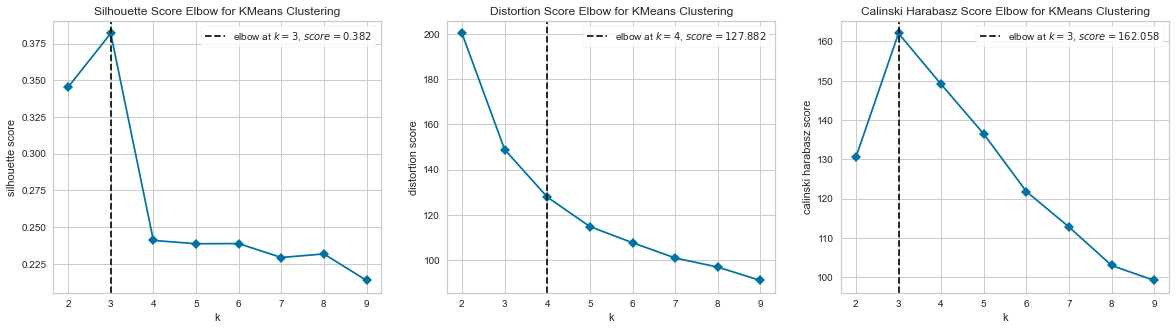

In [25]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize = (20,5))
ax1 = kelbow_visualizer(KMeans(random_state=1), X=Clustering_Data, k=(2, 10), metric='silhouette', timings=False, show=False, ax=ax1)
ax2 = kelbow_visualizer(KMeans(random_state=1), X=Clustering_Data, k=(2, 10), metric='distortion', timings=False, show=False, ax=ax2)
ax3 = kelbow_visualizer(KMeans(random_state=1), X=Clustering_Data, k=(2, 10), metric='calinski_harabasz', timings=False, show=False, ax=ax3)

As seen from the plots, 2 out of 3 metrics indicate that using three clusters was our best choice so we proceed with that number

Now we start creating our clustering model
<br>We use YousefGH KMeans clustering library to create our model with a number of clusters of 3
<br>Then we visualize the number of doctors per cluster and display some of the resulted dataframe

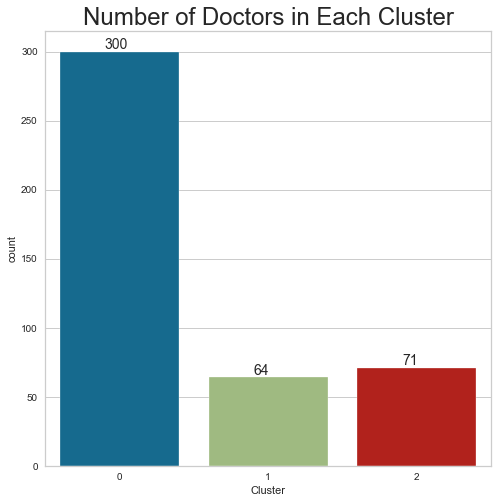

,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases,Instructions,Total Complaints,Most Complaint,Cluster
DoctorID,,,,,,,,,,,,
AHDCBA,0.977778,1.0,0.0,1.000000,0.211765,0.76925,0.221402,0.365079,1.0,0.0,0.0,2
ABHAHF,0.466667,0.0,0.0,0.744409,0.000000,1.00000,0.000000,0.277778,0.0,0.0,0.0,1
FDHFJ,0.533333,1.0,0.0,0.659212,0.360000,0.50000,0.000000,0.246032,0.0,0.0,0.0,0
BJJHCA,0.022222,1.0,0.0,0.552716,0.477647,0.50000,0.088561,0.206349,0.0,0.0,0.0,0
FJBEA,0.244444,1.0,0.0,0.446219,0.225882,0.88395,0.138376,0.166667,0.0,0.0,0.0,0


In [26]:
kmeans =  KMeansInterp(n_clusters=3, random_state=0, ordered_feature_names=Clustering_Data.columns , feature_importance_method='wcss_min')
Clustering_Data['Cluster'] =  kmeans.fit_predict(Clustering_Data)
plt.figure(figsize = (8,8))

ax = sns.countplot(data=Clustering_Data, x='Cluster')
for p in ax.patches:
    ax.annotate(p.get_height() , (p.get_x()+0.3, p.get_height()+2), fontsize=14)
ax.set_title("Number of Doctors in Each Cluster", fontsize=24)

plt.savefig("Plots/Clusters.png", bbox_inches="tight")
plt.show()

display(Clustering_Data.head())

## Which Features Impact Each Cluster the Most?

Now we need to find which feature impact our clusters the most
<br>And thanks to YousefGH Kmeans Feature Importance addition to SKLearn's clustering library, we can find the weight of each feature in each cluster
<br>After using proper calculations, we now display the feature importance of each cluster on a circular bar plot

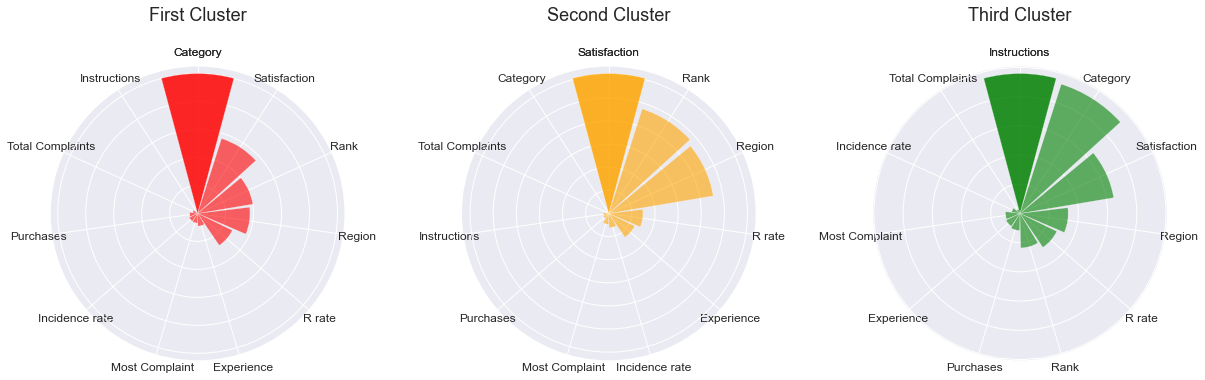

In [27]:
x = list(kmeans.feature_importances_.items())
cluster0_df = pd.DataFrame(x[0][1], columns=['Feature', 'Importance'])
cluster0_df['Importance'] = (cluster0_df['Importance']*100).round(3)
cluster0_df = cluster0_df.append(cluster0_df.iloc[0])

cluster1_df = pd.DataFrame(x[1][1], columns=['Feature', 'Importance'])
cluster1_df['Importance'] = (cluster1_df['Importance']*100).round(3)
cluster1_df = cluster1_df.append(cluster1_df.iloc[0])

cluster2_df = pd.DataFrame(x[2][1], columns=['Feature', 'Importance'])
cluster2_df['Importance'] = (cluster2_df['Importance']*100).round(3)
cluster2_df = cluster2_df.append(cluster2_df.iloc[0])

angles = np.linspace(0,2*np.pi,11, endpoint=False)
angles = np.concatenate((angles,[angles[0]]))

plt.style.use('seaborn')
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize = (20,11), subplot_kw={'projection': 'polar'})
width = 2*np.pi / len(cluster0_df.index)

ax1.set_thetagrids(angles * 180/np.pi, cluster0_df['Feature'], size=12)
ax1.bar(angles, cluster0_df['Importance'], color='red', width=width, alpha=0.6)
ax1.set_title("First Cluster\n", size=18)
ax1.set_yticklabels([])
ax1.set_theta_zero_location('N')
ax1.set_theta_direction(-1)

ax2.set_thetagrids(angles * 180/np.pi, cluster1_df['Feature'], size=12)
ax2.bar(angles, cluster1_df['Importance'], color='orange', width= width, alpha=0.6)
ax2.set_title("Second Cluster\n", size=18)
ax2.set_yticklabels([])
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)

ax3.set_thetagrids(angles * 180/np.pi , cluster2_df['Feature'], size=12)
ax3.bar(angles, cluster2_df['Importance'], color='green', width= width, alpha=0.6)
ax3.set_title("Third Cluster\n", size=18)
ax3.set_yticklabels([])
ax3.set_theta_zero_location('N')
ax3.set_theta_direction(-1)

plt.subplots_adjust(wspace=0.4)
plt.savefig("Plots/ClusterImportances.png", bbox_inches="tight")
plt.show()

As seen from the three plots, we can conclude that:
<br>
- <b>For the first cluster</b>:
    - Category and Satisfaction are the most effective features
    - Instructions and total complaints are the weakest
<br>
- <b>For the second cluster</b>:
    - Satisfaction and doctor rank are our best features
    - Total complaints and instructions are our worst features
<br>
- <b>For the third cluster:</b>
    - Instructions and doctor category are the most important features
    - Total complaint and the incidence rate are the worst features

## Processing Results

After getting out clusters, we reverse our scaled values to their original sizes back so we can perform some operations on the real values

In [28]:
clusters = Clustering_Data['Cluster']
data = Clustering_Data.drop('Cluster', axis=1)
denormalized = scaler.inverse_transform(data.values)
Clustering_Data2 = pd.DataFrame(denormalized, index=data.index, columns=data.columns).merge(clusters, how='left', left_index=True, right_index=True)
Clustering_Data2.head()

,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases,Instructions,Total Complaints,Most Complaint,Cluster
DoctorID,,,,,,,,,,,,
AHDCBA,44.0,1.0,0.0,49.0,0.90,53.85,1.20,49.0,2.0,0.0,0.0,2
ABHAHF,21.0,0.0,0.0,37.0,0.00,100.00,0.00,38.0,0.0,0.0,0.0,1
FDHFJ,24.0,1.0,0.0,33.0,1.53,0.00,0.00,34.0,0.0,0.0,0.0,0
BJJHCA,1.0,1.0,0.0,28.0,2.03,0.00,0.48,29.0,0.0,0.0,0.0,0
FJBEA,11.0,1.0,0.0,23.0,0.96,76.79,0.75,24.0,0.0,0.0,0.0,0


We then group the data by their cluster type and perform some operations like:
- Mode(most frequent value) on the categorical data like the region or most complaint type
- Mean(Average) on the numerical data like the satisfaction and experience

In [29]:
Categorized_data = Clustering_Data2.groupby('Cluster', as_index=False)
Categorical_data = Categorized_data[['Region', 'Category', 'Rank', 'Instructions', 'Most Complaint']].agg(lambda x: x.value_counts().index[0])
numerical_data = Categorized_data[['Incidence rate', 'R rate', 'Satisfaction', 'Experience', 'Purchases', 'Total Complaints']].mean()
Categorized_data = pd.merge(Categorical_data, numerical_data, on='Cluster', how='left')
Categorized_data

,Cluster,Region,Category,Rank,Instructions,Most Complaint,Incidence rate,R rate,Satisfaction,Experience,Purchases,Total Complaints
0,0,9.0,1.0,0.0,0.0,0.0,5.153967,1.170600,12.457967,0.487933,10.163333,0.713333
1,1,2.0,0.0,6.0,0.0,0.0,4.937344,0.628125,21.002969,0.673125,6.281250,0.140625
2,2,22.0,1.0,0.0,2.0,0.0,4.712113,1.191268,30.137606,0.570141,17.661972,0.605634


The next step is to map back the encoded categorical values into their original ones (knows as decoding)

In [30]:
Categorized_data['Category'] = Categorized_data['Category'].map(Category_dict)
Categorized_data['Rank'] = Categorized_data['Rank'].map(Rank_dict)
Categorized_data['Region'] = Categorized_data['Region'].map(Region_dict)
Categorized_data['Most Complaint'] = Categorized_data['Most Complaint'].map(Complaint_dict).fillna('Unknown')
Categorized_data['Instructions'] = np.where(Categorized_data['Instructions'] == 2, 'Yes', 'No')
Categorized_data['Satisfaction'] = np.where(Categorized_data['Satisfaction'] == -1, 'No Info', Categorized_data['Satisfaction'].astype(int))
Categorized_data = Categorized_data[["Cluster", "Region", "Category", "Rank", "Experience", "Incidence rate", "R rate", "Satisfaction",
                                     "Purchases", "Instructions", "Total Complaints", "Most Complaint"]]
Categorized_data.rename(columns={"Total Complaints": "Complaint Percentage"}, inplace=True)
Categorized_data = Categorized_data.round(3)
Categorized_data['Complaint Percentage'] *= 100 
#Categorized_data = Categorized_data[["Experience", "Incidence rate", "R rate", "Purchases", "Complaint Percentage"]]
Categorized_data['Best Features'] =[cluster0_df.iloc[:3].values[0][0] + ', ' + cluster0_df.iloc[:3].values[1][0] + ', ' + cluster0_df.iloc[:3].values[2][0],
                                    cluster1_df.iloc[:3].values[0][0] + ', ' + cluster1_df.iloc[:3].values[1][0] + ', ' + cluster1_df.iloc[:3].values[2][0],
                                    cluster2_df.iloc[:3].values[0][0] + ', ' + cluster2_df.iloc[:3].values[1][0] + ', ' + cluster2_df.iloc[:3].values[2][0]]

Categorized_data['Worst Features'] =[cluster0_df.iloc[-4:-1].values[2][0] + ', ' + cluster0_df.iloc[-4:-1].values[1][0] ,
                                    cluster1_df.iloc[-4:-1].values[2][0] + ', ' + cluster1_df.iloc[-4:-1].values[1][0] ,
                                    cluster2_df.iloc[-4:-1].values[2][0] + ', ' + cluster2_df.iloc[-4:-1].values[1][0]]
Categorized_data

,Cluster,Region,Category,Rank,Experience,Incidence rate,R rate,Satisfaction,Purchases,Instructions,Complaint Percentage,Most Complaint,Best Features,Worst Features
0,0,1 14,Specialist,Ambassador,0.488,5.154,1.171,12,10.163,No,71.3,Correct,"Category, Satisfaction, Rank","Instructions, Total Complaints"
1,1,1 11,General Practitioner,Silver Plus,0.673,4.937,0.628,21,6.281,No,14.1,Correct,"Satisfaction, Rank, Region","Category, Total Complaints"
2,2,1 9,Specialist,Ambassador,0.570,4.712,1.191,30,17.662,Yes,60.6,Correct,"Instructions, Category, Satisfaction","Total Complaints, Incidence rate"


## Clustering Results

Now after having all the clustering data available and the properties of each one we display a plot for each cluster showing:
- A radar plot showing the numerical data relative to each other cluster (not absolute values)
- A box under each plot indicating all the properties of this cluster like the most common doctors rank or what affects this cluster the most

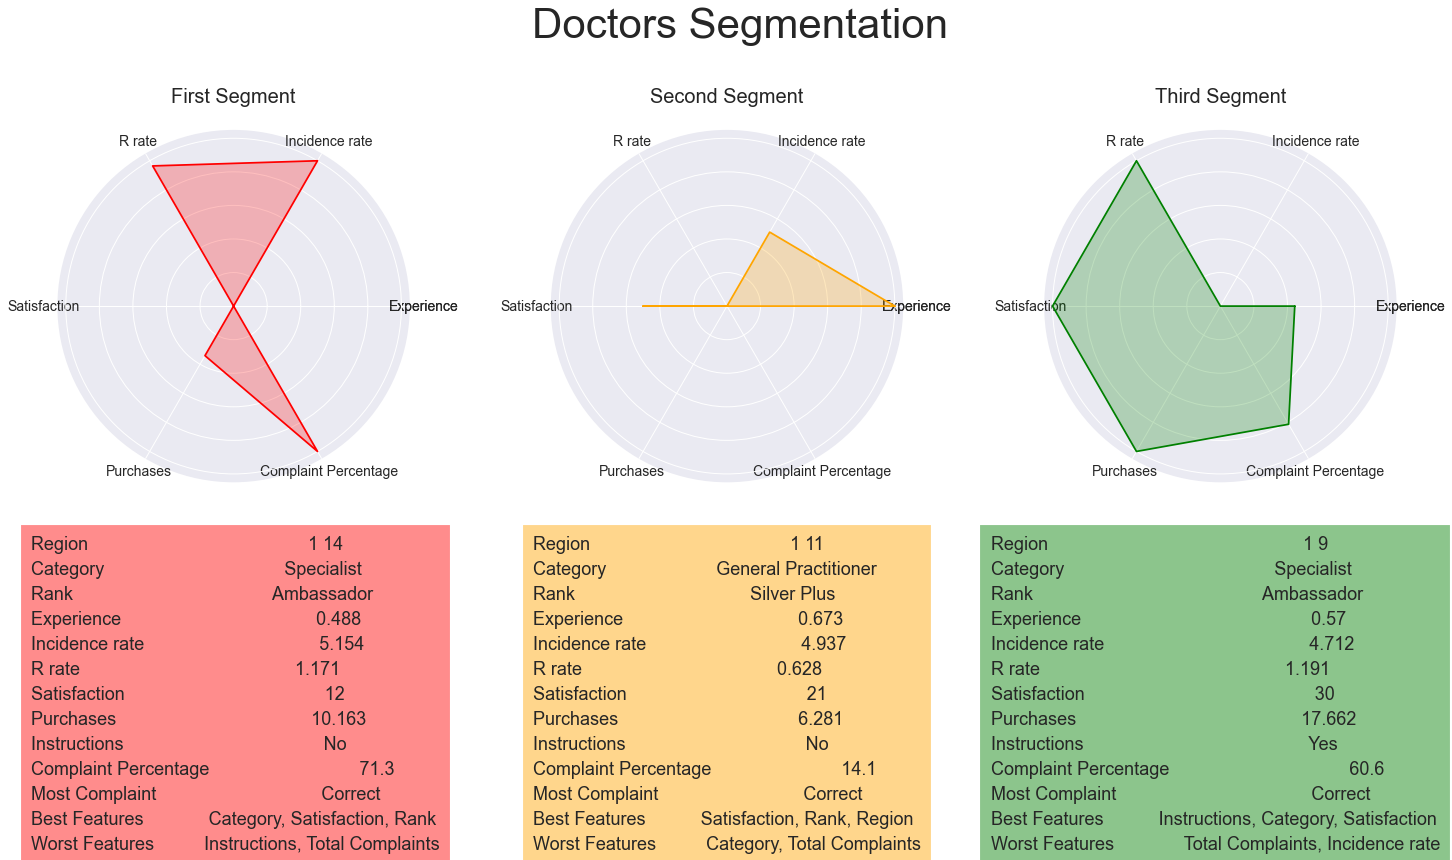

In [31]:
radar_df = Categorized_data[["Experience", "Incidence rate", "R rate", "Satisfaction", "Purchases", "Complaint Percentage", "Experience"]]
radar_data = scaler.fit_transform(radar_df.values)
radar_df = pd.DataFrame(radar_data, index=radar_df.index, columns=radar_df.columns)
radar_df

angles = np.linspace(0,2*np.pi,6, endpoint=False)
angles = np.concatenate((angles,[angles[0]]))

plt.style.use('seaborn')

fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize = (24,15), subplot_kw={'projection': 'polar'})
fig.suptitle("Doctors Segmentation", fontsize=42, x=0.52, y=0.78)

ax1.set_thetagrids(angles * 180/np.pi, ["Experience", "Incidence rate", "R rate", "Satisfaction","Purchases", "Complaint Percentage", "Experience"], size=14)
ax1.plot(angles, radar_df.iloc[0], color='red')
ax1.set_title("First Segment\n", size=20)
ax1.fill(angles, radar_df.iloc[0], color='red', alpha=0.25)
ax1.set_yticklabels([])

ax2.set_thetagrids(angles * 180/np.pi, ["Experience", "Incidence rate", "R rate", "Satisfaction","Purchases", "Complaint Percentage", "Experience"], size=14)
ax2.plot(angles, radar_df.iloc[1], color='orange')
ax2.set_title("Second Segment\n", size=20)
ax2.fill(angles, radar_df.iloc[1], color='orange', alpha=0.25)
ax2.set_yticklabels([])

ax3.set_thetagrids(angles * 180/np.pi , ["Experience", "Incidence rate", "R rate", "Satisfaction","Purchases", "Complaint Percentage", "Experience"], size=14)
ax3.plot(angles, radar_df.iloc[2], color='green')
ax3.set_title("Third Segment\n", size=20)
ax3.fill(angles, radar_df.iloc[2], color='green', alpha=0.25)
ax3.set_yticklabels([])

plt.figtext(0.11, 0, Categorized_data.iloc[0][1:].to_string(), ha="left", fontsize=18, linespacing=1.5, bbox={"facecolor":"red", "alpha":0.45, "pad":10})

plt.figtext(0.4, 0, Categorized_data.iloc[1][1:].to_string(), ha="left", fontsize=18, linespacing=1.5, bbox={"facecolor":"orange", "alpha":0.45, "pad":10})

plt.figtext(0.665, 0, Categorized_data.iloc[2][1:].to_string(), ha="left", fontsize=18, linespacing=1.5, bbox={"facecolor":"green", "alpha":0.45, "pad":10})

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)
plt.savefig("Plots/Result.png", bbox_inches="tight")
plt.show()

Now as we see, each radar explains each variable with its relation to the other segments
<br>Like for example, the third cluster shows highest number of purchases while the first shows low and the second shows the lowest of them
<br>The bottom boxes indicate the average or most common features of each cluster like the region, most complaint type